# 📋Table of Contents
- [1. Introduction](#1)
- [2. 📚 Import Libraries](#2)
- [3. 📖 Read Dataset](#3)
<!-- - [4. Missing Values](#4) -->
- [4. Exploratory Data Analysis](#5)
- [5. Conclusion conducting of EDA](#6)
- [6. Data Preprocessing](#7)
- [7. Model Building](#8)
- [8. 📊Generate Predictions and Create Submission File](#9)


# <center> <a id="1"> Introduction
    

Welcome to the "Sustainable Urban Living" Kaggle Challenge! In this competition, we're tasked with developing AI models to predict the habitability score of properties, crucial for urban planning and real estate investment decisions. By exploring diverse datasets encompassing socio-economic, environmental, and infrastructural factors, we'll employ advanced machine learning techniques to uncover patterns and relationships within the data. Join us in this exciting journey to contribute to the creation of smarter, greener, and more livable cities!







# <center> <a id="2"> 📚 Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

#get rid of some warnings
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na") 

from scipy.stats import norm
import statsmodels.api as sm

# <center><a id="3"> 📖 Read Dataset

In [2]:
train_path = "/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv"
test_path = "/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv"
df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
df.head(3)

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39


In [3]:
#checking for null values
100*df.isnull().mean()[df.isnull().mean()>0]

Number_of_Windows         4.218488
Furnishing                2.620336
Frequency_of_Powercuts    3.509605
Crime_Rate                1.990569
Dust_and_Noise            3.161492
dtype: float64

There are a few null valies. Let's explore the dataset to figure out how to deal them.

<br>

# <center> <a id="5">Exploratory Data Analysis
    

**First step should be to understand you data, gain Insights from it draw some preconception and then corroborate it with analytics.**

In order to do so, we will perform following Step:
1. **Problem Statement**: Understand our problem statement and given data 
1. **Label/Dependent Variables**: Figure out what our label comprisese of and understand it.
1. **Features/ Independent Variables**: What are all the features available and how do they influence label.
1. **Univariate Relation**: Understand relation of each independent variable with dependent variable. Identify significant features that strongly correlate with house prices
1. **Multivariate Relation**: Understant how all independent varible as whole affect dependent varibale.Engineer new features or transform existing ones to capture nonlinear relationships and enhance predictive performance.
1. **EDA Conclusion**: Based on above exploration, conclude the practise we are futher going to take to build our Model.
    
    
Before diving deep into anlaysis, let's check total features available.


In [4]:
df.shape[1], df.columns

(15,
 Index(['Id', 'Property_Type', 'Property_Area', 'Number_of_Windows',
        'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts',
        'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate',
        'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review',
        'Habitability_score'],
       dtype='object'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      31599 non-null  object 
 1   Property_Type           31599 non-null  object 
 2   Property_Area           31599 non-null  int64  
 3   Number_of_Windows       30266 non-null  float64
 4   Number_of_Doors         31599 non-null  int64  
 5   Furnishing              30771 non-null  object 
 6   Frequency_of_Powercuts  30490 non-null  float64
 7   Power_Backup            31599 non-null  object 
 8   Water_Supply            31599 non-null  object 
 9   Traffic_Density_Score   31599 non-null  float64
 10  Crime_Rate              30970 non-null  object 
 11  Dust_and_Noise          30600 non-null  object 
 12  Air_Quality_Index       31599 non-null  float64
 13  Neighborhood_Review     31599 non-null  float64
 14  Habitability_score      31599 non-null

From first look at the columns and checking the description of columns, We can say:
 "Id" column has no importance to "Habitability_score" as it is used only to uniquely identify each entry. So we'll drop it.

In [6]:
# drop id column
df.drop(columns = "Id", inplace=True)

### Let's check how our Label looks like

In [7]:
df["Habitability_score"].isnull().sum(),df["Habitability_score"].describe()

(0,
 count    31599.00000
 mean        73.43742
 std         14.14674
 min          7.28000
 25%         69.64000
 50%         75.75000
 75%         82.20000
 max        100.00000
 Name: Habitability_score, dtype: float64)

- Great, there are no null values also the *min* is 7.2 states that there are no zero's.
- It seems like "Habitability_score" is negative skewed. (all 25%,50%,75% and max are in a range but min seems to be off from them). Let's verify it.

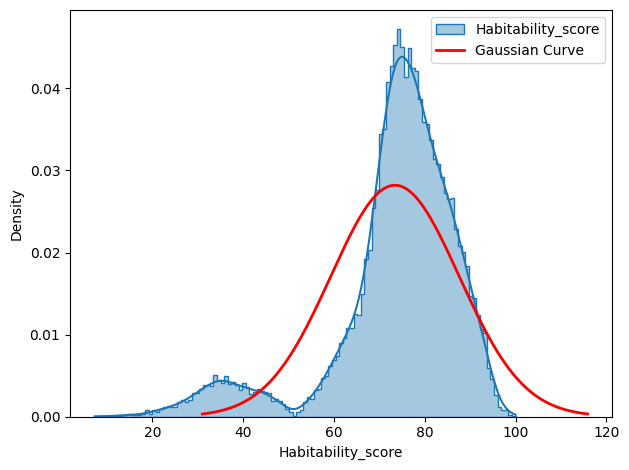

In [8]:
sns.histplot(df["Habitability_score"], kde=True, stat="density", 
             alpha=0.4, element="step", label="Habitability_score")

# calculating parameters for Gaussian Curve
mean = df["Habitability_score"].mean()
std_dev = df["Habitability_score"].std()
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)
y = norm.pdf(x, mean, std_dev)

# Plot the Gaussian curve
plt.plot(x, y, 'r', linewidth=2,label='Gaussian Curve')

plt.legend()
plt.tight_layout()
plt.show()

We can confirm from the above plot:
- It is deviated from the normal distribution and negatively skewed.
- It also seems leptokurtic. 

Let's confirm this by getting statistical values.

In [9]:
print(f"Skewness: {df['Habitability_score'].skew():.4f}")
print(f"Curtosis: {df['Habitability_score'].kurt():.4f}")

Skewness: -1.5619
Curtosis: 2.7510


### Pairing Label with Numeric Columns

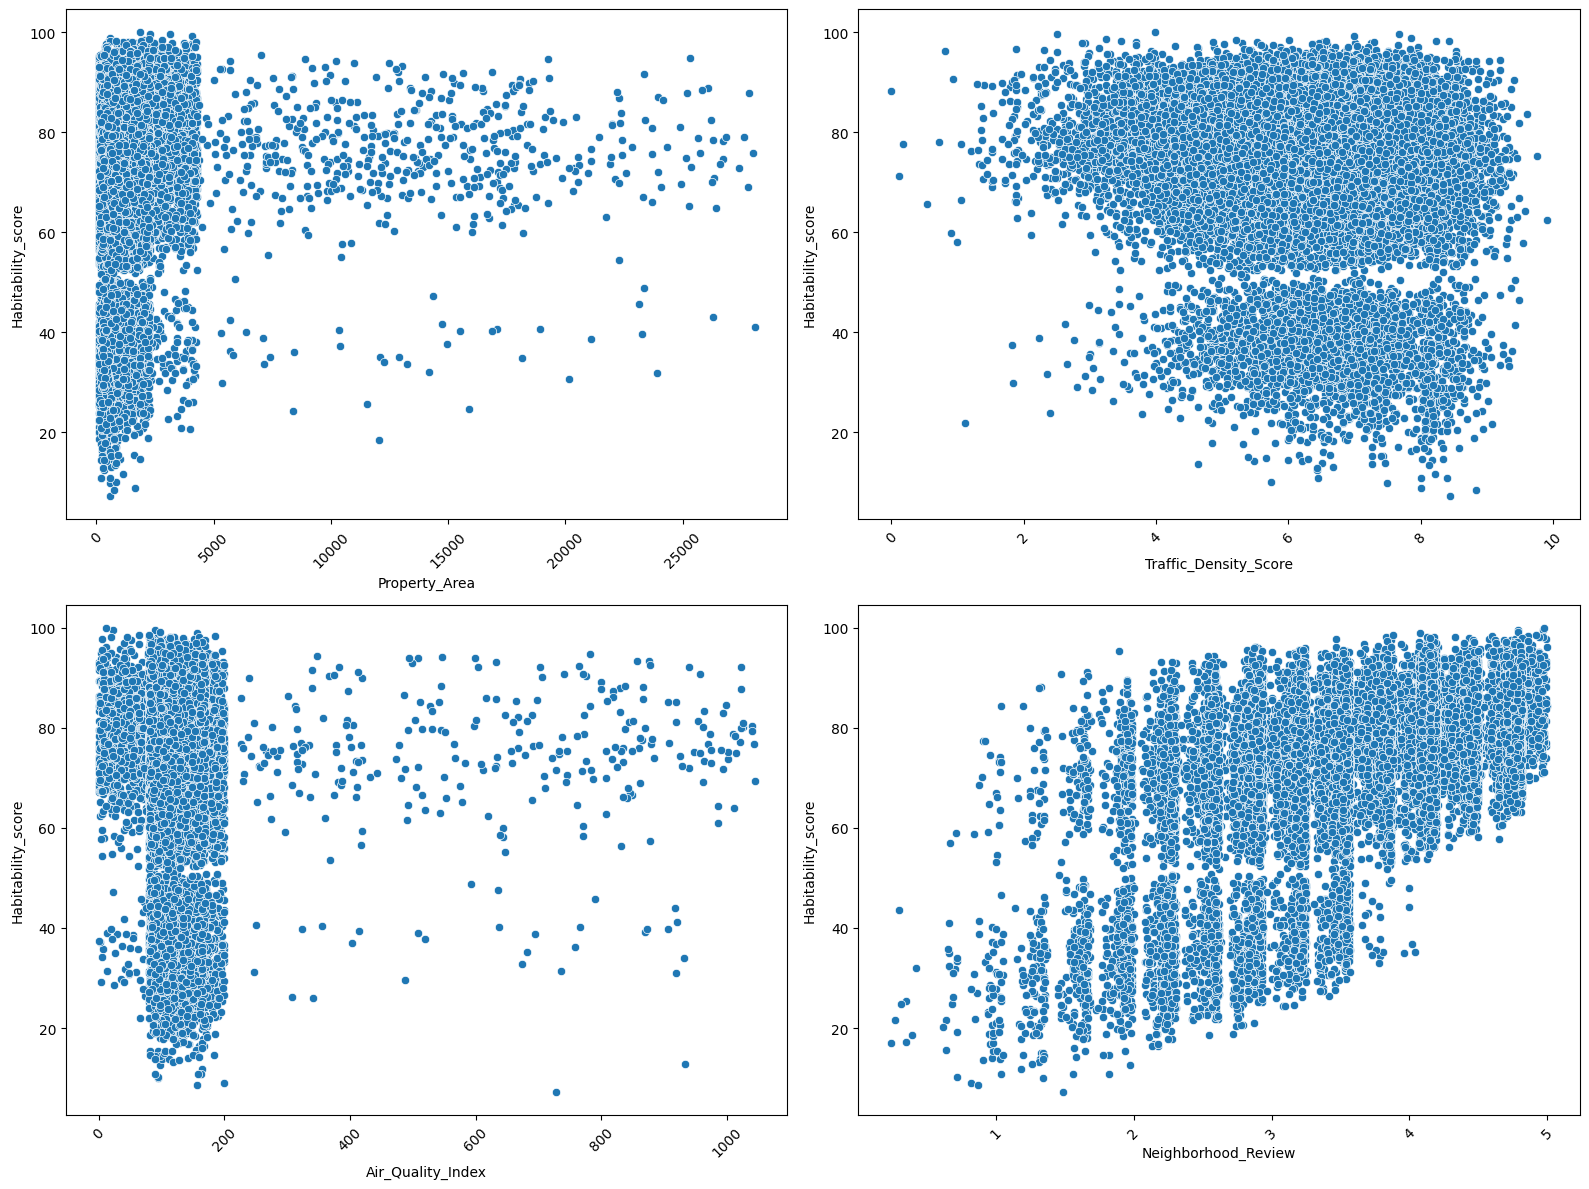

In [10]:
numeric = ["Property_Area", "Traffic_Density_Score", "Air_Quality_Index", "Neighborhood_Review"]

fig, axs = plt.subplots(2,2, figsize=(16,12))
for ind, col in enumerate(numeric):
    sns.scatterplot(df, x=col, y="Habitability_score", ax=axs[ind//2, ind%2])
    axs[ind//2, ind%2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


<br>

### Pairing Label with Categorical Columns

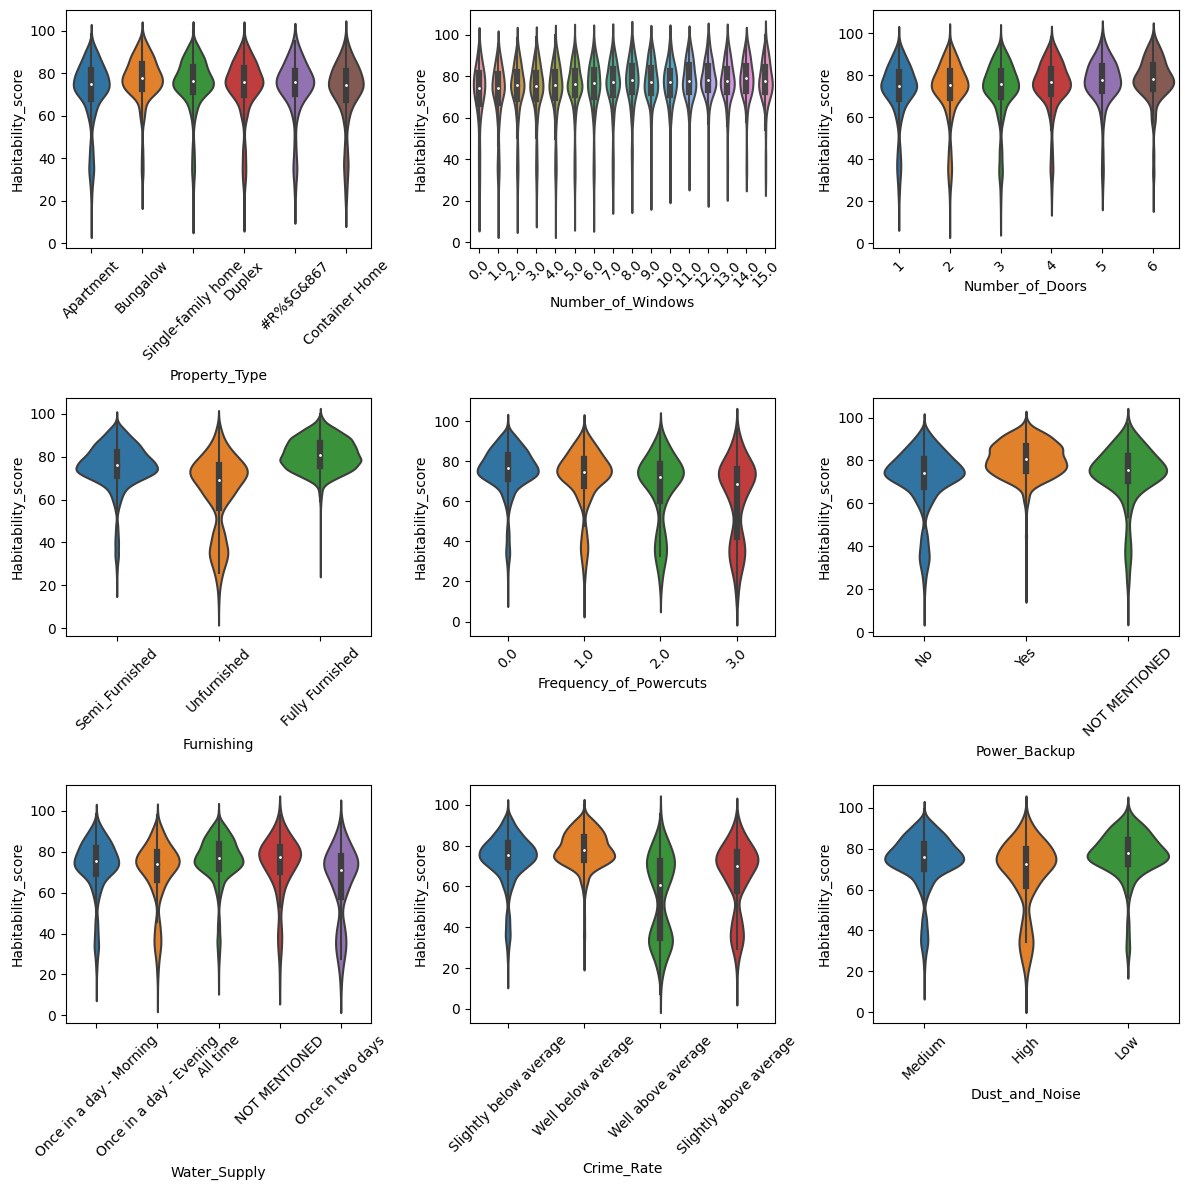

In [11]:
categorical = ["Property_Type","Number_of_Windows","Number_of_Doors",
               "Furnishing","Frequency_of_Powercuts","Power_Backup",
               "Water_Supply","Crime_Rate","Dust_and_Noise"]

fig, axs = plt.subplots(3,3, figsize=(12,12))
for ind, col in enumerate(categorical):
    sns.violinplot(df, x=col, y="Habitability_score", ax=axs[ind//3, ind%3])
    axs[ind//3, ind%3].tick_params(axis="x", rotation=45)
plt.tight_layout()

We can clearly see that there is no linear relation of features with labe except Neighborhood_Review which has some sort of exponential relation.



### Features with other Features

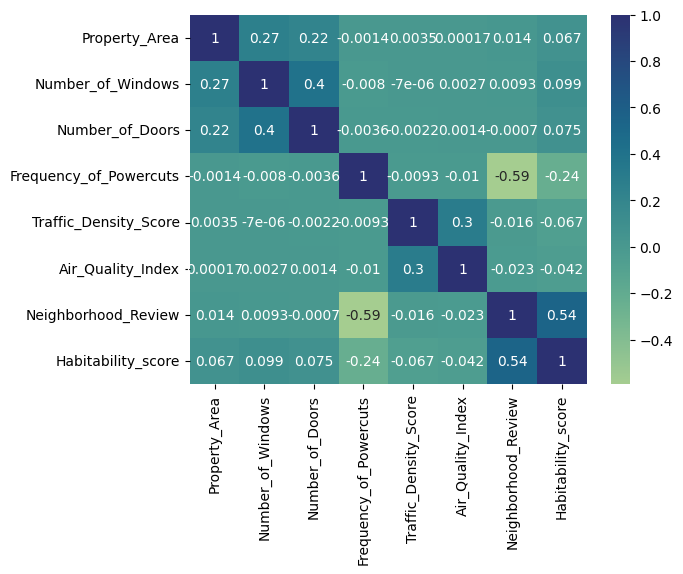

In [12]:
corr_mat = df.corr(numeric_only=True)
sns.heatmap(corr_mat, cmap="crest", annot=True)
plt.show()

Apart from "Frequency_of_Powercuts" and "Neighborhood_Review" there is no sign of collinearity.

In [13]:
# sns.pairplot(df[numeric+['Habitability_score']][0:5000],
#              height=2,corner=True,diag_kind='hist',kind='kde')

# <center> <a id="6"> Conclusion conducting of EDA
    
- Label is negative skewed and is laptokurtic.
- Apart from "Neighborhood_Review", hardly any feature show signs of linear relation with label.
- Almost all feature are independent of collinearity except of "Frequency_of_Powercuts" and "Neighborhood_Review" where we see slight correlation.
    
The fact that only a few feature seems to have linear relationship with the label, we should avoid using any model that works on distance or linearity.
    For this kind of task where:
- the laws are not linear
- features have discrete and continuous types
- correlation is hard to intrepret

**We can use any tree based algorithm such as *DecisionTree* or its ensemble form "RandomForest" to further boost the performance.**

# <center> <a id="7">Data Preprocessing
    
    
We will perform the following steps in data preprocessing.
* Perform data cleaning to handle missing values, outliers, and inconsistencies in the dataset.
* Normalize or scale numerical features to ensure uniformity in the data distribution.
* Encode categorical variables using techniques like one-hot encoding or label encoding for compatibility with machine learning algorithms.

In [14]:
# selecting features and label
x = df.drop(columns="Habitability_score")
y = df["Habitability_score"]
x.shape, y.shape

((31599, 13), (31599,))

In [15]:
# seperating testing and validation data
x_train, x_val, y_train, y_val = train_test_split(x,y,
                                                 test_size=0.20,
                                                 random_state=42)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((25279, 13), (25279,), (6320, 13), (6320,))

In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25279 entries, 28272 to 23654
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Type           25279 non-null  object 
 1   Property_Area           25279 non-null  int64  
 2   Number_of_Windows       24249 non-null  float64
 3   Number_of_Doors         25279 non-null  int64  
 4   Furnishing              24631 non-null  object 
 5   Frequency_of_Powercuts  24378 non-null  float64
 6   Power_Backup            25279 non-null  object 
 7   Water_Supply            25279 non-null  object 
 8   Traffic_Density_Score   25279 non-null  float64
 9   Crime_Rate              24793 non-null  object 
 10  Dust_and_Noise          24489 non-null  object 
 11  Air_Quality_Index       25279 non-null  float64
 12  Neighborhood_Review     25279 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 2.7+ MB


In [17]:
# percentage of null data
print(f"Null data is {100*len(x_train[x_train.isnull().any(axis=1)])/len(x_train):.2f}% of all data.")

Null data is 14.40% of all data.


In [18]:
# checking for null values in each column of train dataset
100*x_train.isnull().mean()[x_train.isnull().mean()>0]

Number_of_Windows         4.074528
Furnishing                2.563393
Frequency_of_Powercuts    3.564223
Crime_Rate                1.922544
Dust_and_Noise            3.125124
dtype: float64

In [19]:
# checking for null values in each column of validation dataset
100*x_val.isnull().mean()[x_val.isnull().mean()>0]

Number_of_Windows         4.794304
Furnishing                2.848101
Frequency_of_Powercuts    3.291139
Crime_Rate                2.262658
Dust_and_Noise            3.306962
dtype: float64

Columns that have null values:
* categorical: Furnishing, Crime_Rate,Dust_and_Noise
* numeric: Number_of_Windows,Frequency_of_Powercuts

To maintian the central tendencies in the data, We will impute numeric columns with *mean* value and categorical columns with the *most frequent* value.


In [20]:
# seperating numerical and categorical data for imputation
x_train_num = x_train.select_dtypes(exclude = "object")
x_train_cat = x_train.select_dtypes(include = "object")

x_val_num = x_val.select_dtypes(exclude = "object")
x_val_cat = x_val.select_dtypes(include = "object")

# imputing Numerical Columns
si_num = SimpleImputer()
x_train_num_si = pd.DataFrame(si_num.fit_transform(x_train_num),
                             columns= x_train_num.columns,
                             index=x_train_num.index)
x_val_num_si = pd.DataFrame(si_num.transform(x_val_num),
                           columns= x_val_num.columns,
                           index=x_val_num.index)

# imputing Categorical Columns
si_cat = SimpleImputer(strategy="most_frequent")
x_train_cat_si = pd.DataFrame(si_cat.fit_transform(x_train_cat),
                          columns = x_train_cat.columns,
                          index = x_train_cat.index)
x_val_cat_si = pd.DataFrame(si_cat.transform(x_val_cat),
                        columns = x_val_cat.columns,
                        index = x_val_cat.index)

As machine learning model require numeric data, we need to convert categorical data into numericals, for this we do *Encoding* of categorical columns.<br>
Let's look at all the unique values of categorical columns to decide the type of encoding to perform.

In [21]:
for col in x_train_cat_si.columns:
    print(f"{col}: {x_train_cat_si[col].unique()}")
    print("----------------------------")

Property_Type: ['Apartment' 'Duplex' 'Bungalow' 'Single-family home' 'Container Home'
 '#R%$G&867']
----------------------------
Furnishing: ['Semi_Furnished' 'Unfurnished' 'Fully Furnished']
----------------------------
Power_Backup: ['No' 'Yes' 'NOT MENTIONED']
----------------------------
Water_Supply: ['All time' 'Once in a day - Morning' 'Once in a day - Evening'
 'Once in two days' 'NOT MENTIONED']
----------------------------
Crime_Rate: ['Slightly above average' 'Well above average' 'Well below average'
 'Slightly below average']
----------------------------
Dust_and_Noise: ['Low' 'Medium' 'High']
----------------------------


There seems to be a logical order in all the columns. All unique values can be arrange from low to high as:
- Property_Type: ['#R%$G&867', 'Single-family home', 'Apartment', 'Bungalow', 'Duplex', 'Container Home']
- Furnishing: ['Unfurnished', 'Semi_Furnished', 'Fully Furnished']
- Power_Backup: ['No', 'NOT MENTIONED', 'Yes']
- Water_Supply: ['NOT MENTIONED', 'Once in two days', 'Once in a day - Morning', 'Once in a day - Evening', 'All time']
- Crime_Rate: ['Well below average', 'Slightly below average', 'Slightly above average', 'Well above average']
- Dust_and_Noise: ['Low', 'Medium', 'High']

**When there is logical order in the categories, we use *OneHotEncoding***<br>
Also, notice there is garbage value '#R%$G&867' in Property_Type' which may otherwise need attention but sicne we are OneHotEncoding, we can assign it lowest rank.

In [22]:
ord = OrdinalEncoder(categories = [['#R%$G&867', 'Single-family home', 'Apartment', 'Bungalow', 'Duplex', 'Container Home'],
                                   ['Unfurnished', 'Semi_Furnished', 'Fully Furnished'],
                                   ['No', 'NOT MENTIONED', 'Yes'],
                                   ['NOT MENTIONED', 'Once in two days', 'Once in a day - Morning', 'Once in a day - Evening', 'All time'],
                                   ['Well below average', 'Slightly below average', 'Slightly above average', 'Well above average'],
                                   ['Low', 'Medium', 'High']
                                  ],
                     handle_unknown = "use_encoded_value", unknown_value = -1)



x_train_cat_si[ord.get_feature_names_out()] = ord.fit_transform(x_train_cat_si)
x_val_cat_si[ord.get_feature_names_out()] = ord.transform(x_val_cat_si)

# mergin categorical and numerical columns
x_train = pd.concat([x_train_num_si, x_train_cat_si], axis=1)
x_val = pd.concat([x_val_num_si, x_val_cat_si], axis=1)
x_train.head(3)

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
28272,258.0,2.0,2.0,2.0,3.68,83.0,2.38,2.0,1.0,0.0,4.0,2.0,0.0
31582,1243.0,7.0,1.0,0.0,6.71,96.0,2.91,4.0,1.0,2.0,4.0,3.0,1.0
19318,2215.0,10.0,2.0,2.0,7.76,148.0,3.46,3.0,1.0,0.0,4.0,0.0,1.0


We're done with our preprocessing and are ready to build our model

# <center> <a id = 8>Model Building

We need to check multiple times the result of model as we keep on tune the hyperparamets. So creating a function that will store the result of each time we test our model on validation set.

In [23]:
# model evaluation
def evaluation(method, x_train, x_test, y_train, y_test, 
               model=None, result_df=pd.DataFrame(), 
               describe=False, transform=False, trans_obj=None):
    """
    method: Tuning parameter for reference
    x_train: trianing dataset to train the model
    x-test: testing dataset to test the model
    y_trian: label values of trainig dataset
    y_test: label values of testing dataset to evluate
    result_df: Dataframe to store the result of each model
    describe: set True, if you want description stats for each model
    tranform: {True, "log", "sqrt"} If label columns need to be reversed transformed. 
    trans_obj: if transform set to True, object needed to reverse transform label else performs log or sqrt depending on value of transform
    """
    
    model = model

    if not any(result_df):
        result_df = pd.DataFrame({
    "method": [],
    "r2_train": [],
    "r2_test":[],
    "adj_r2_train": [],
    "adj_r2_test": [],
    "train_rmse": [],
    "test_rmse": []
    })
    n_r_train, n_c_train = x_train.shape
    n_r_test, n_c_test = x_test.shape

    # model fit
    model.fit(x_train, y_train)
    
    # predict
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # reverse transform
    if transform == "log":
        y_pred_train = np.exp(y_pred_train)
        y_pred_test = np.exp(y_pred_test)
    elif transform == "sqrt":
        y_pred_train = pow(y_pred_train,2)
        y_pred_test = pow(y_pred_test,2)
    elif transform:
        
        y_pred_train = trans_obj.inverse_transform(pd.DataFrame(y_pred_train))
        y_pred_test = trans_obj.inverse_transform(pd.DataFrame(y_pred_test))


    # r2 score
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # adjusted r2
    adj_r2_train = 1 - ((1-train_r2)*(n_r_train-1)/ (n_r_train-n_c_train-1))
    adj_r2_test = 1 - ((1-test_r2)*(n_r_test-1)/ (n_r_test-n_c_test-1))

    # rmse
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    # printing values
    if describe:
        print(f"r2 score---")
        print(f"train_r2: {round(train_r2,4)}, test_r2: {round(test_r2,4)}")
        print("-------------------------")
    
        print(f"Adj r2 score---")
        print(f"train_adj_r2: {round(adj_r2_train,4)}, test_adj_r2: {round(adj_r2_test,4)}")
        print("-------------------------")
        
        print(f"rmse score---")
        print(f"train_rmse: {round(train_rmse,4)}, test_rmse: {round(test_rmse,4)}")
        print("-------------------------")

    temp_df = pd.DataFrame({
    "method": [method],
    "r2_train": [round(train_r2,4)],
    "r2_test":[round(test_r2,4)],
    "adj_r2_train": [round(adj_r2_train,4)],
    "adj_r2_test": [round(adj_r2_test,4)],
    "train_rmse": [round(train_rmse,4)],
    "test_rmse": [round(test_rmse,4)]
    })
    result_df = pd.concat([result_df, temp_df]).reset_index(drop=True)
    return result_df

In [24]:
rf_default = RandomForestRegressor(random_state=16)
results = evaluation("Default RF", x_train=x_train, x_test=x_val,
                     y_train=y_train, y_test=y_val, model=rf_default)
results

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,Default RF,0.9752,0.815,0.9752,0.8146,2.2396,5.931


Well thats a pretty good result but we can see that model is overfitting as train_rmse is quite less than test_rmse. Can also be verified from r2 score.
<br>

### Trying hyperparameter tuning

In [25]:
rf = RandomForestRegressor(random_state=16, n_estimators=120)
results = evaluation("Estimator:120", x_train=x_train, x_test=x_val,
                     y_train=y_train, y_test=y_val, model=rf, result_df=results)
results

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,Default RF,0.9752,0.8150,0.9752,0.8146,2.2396,5.9310
1,Estimator:120,0.9754,0.8149,0.9754,0.8145,2.2312,5.9331


In [26]:
rf = RandomForestRegressor(random_state=16, n_estimators=140)
results = evaluation("Estimator:140", x_train=x_train, x_test=x_val,
                     y_train=y_train, y_test=y_val, model=rf, result_df=results)
results

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,Default RF,0.9752,0.8150,0.9752,0.8146,2.2396,5.9310
1,Estimator:120,0.9754,0.8149,0.9754,0.8145,2.2312,5.9331
2,Estimator:140,0.9756,0.8153,0.9755,0.8150,2.2256,5.9256


It's still a overfit model.<br>
Well, trying different hyperparameter sure improves our RMSE but trying all the combinations one by will take forever. So we'll use GridSearchCV to automate this process

### GridSearchCV

We will focus mainly on two parameters: *n_estimators* and *max_depth*

In [27]:
grid = {
    "n_estimators": [80, 110, 140, 200],
    "max_depth" : [4,7,10,14]
}

grid_cv = GridSearchCV(estimator=rf_default,param_grid=grid,n_jobs=-1)

We have some random values of *n_estimators* and *max_depth* for which we want to check out model 

In [28]:
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=16), n_jobs=-1,
             param_grid={'max_depth': [4, 7, 10, 14],
                         'n_estimators': [80, 110, 140, 200]})

In [29]:
grid_cv.best_params_

{'max_depth': 14, 'n_estimators': 200}

Our grid_cv results are out and according it best parameters are *n_estimators=200* and *max_depth=14*. Let's check it with our function

In [30]:
rf = RandomForestRegressor(random_state=16, n_estimators=200, max_depth=14)
results = evaluation("Estimator:200, Depth=14", x_train=x_train, x_test=x_val,
                     y_train=y_train, y_test=y_val, model=rf, result_df=results)
results

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,Default RF,0.9752,0.8150,0.9752,0.8146,2.2396,5.9310
1,Estimator:120,0.9754,0.8149,0.9754,0.8145,2.2312,5.9331
2,Estimator:140,0.9756,0.8153,0.9755,0.8150,2.2256,5.9256
3,"Estimator:200, Depth=14",0.9227,0.8188,0.9227,0.8185,3.9569,5.8695


That's a good improvement, not only our tets_rmse reduces but also our model is not not that much overfit, still I fell it's little bit towards overfit. <br>
Let's try some value in GridSearchCV with keeping mind our best fit values

In [31]:
grid = {
    "n_estimators": [180, 190, 200, 210, 220],
    "max_depth" : [10, 12,14,16]
}

grid_cv = GridSearchCV(estimator=rf_default,param_grid=grid,n_jobs=-1)

In [32]:
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=16), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [180, 190, 200, 210, 220]})

In [33]:
grid_cv.best_params_

{'max_depth': 14, 'n_estimators': 210}

Again, we get the similar parameters, So I think there is no further need to tune hyperparameters.

### Let's Check out model

In [34]:
rf = RandomForestRegressor(random_state=16, n_estimators=210, max_depth=14)
results = evaluation("Estimator:210, Depth=14", x_train=x_train, x_test=x_val,
                     y_train=y_train, y_test=y_val, model=rf, result_df=results)
results

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,Default RF,0.9752,0.8150,0.9752,0.8146,2.2396,5.9310
1,Estimator:120,0.9754,0.8149,0.9754,0.8145,2.2312,5.9331
2,Estimator:140,0.9756,0.8153,0.9755,0.8150,2.2256,5.9256
3,"Estimator:200, Depth=14",0.9227,0.8188,0.9227,0.8185,3.9569,5.8695
4,"Estimator:210, Depth=14",0.9227,0.8188,0.9226,0.8185,3.9579,5.8693


# <center> <a id = 9> 📊Generate Predictions and Create Submission File

### Training on Completer Dataset:
Since we have finalized our model parameters, we will now train model on the full dataset so that if there by luck any hidden pattern in data, our model will be able to learn it

In [35]:
x.shape, y.shape

((31599, 13), (31599,))

### Preprocessing Complete Dataset

We will do the exact same preprocessing for the complete dataset what we did for x_train.

In [36]:
# splitting categorical and numerical columns
x_num = x.select_dtypes(exclude="object")
x_cat = x.select_dtypes(include="object")

In [37]:
# imputing features
si_num = SimpleImputer(add_indicator=False)

# imputing numerical features
x_num = pd.DataFrame(si_num.fit_transform(x_num),
                             columns= x_num.columns,
                             index=x_num.index)


# imputing Categorical Columns
si_cat = SimpleImputer(add_indicator=False, strategy="most_frequent")
x_cat = pd.DataFrame(si_cat.fit_transform(x_cat),
                          columns = x_cat.columns,
                          index = x_cat.index)

In [38]:
# encoding
ord = OrdinalEncoder(categories = [['#R%$G&867', 'Single-family home', 'Apartment', 'Bungalow', 'Duplex', 'Container Home'],
                                   ['Unfurnished', 'Semi_Furnished', 'Fully Furnished'],
                                   ['No', 'NOT MENTIONED', 'Yes'],
                                   ['NOT MENTIONED', 'Once in two days', 'Once in a day - Morning', 'Once in a day - Evening', 'All time'],
                                   ['Well below average', 'Slightly below average', 'Slightly above average', 'Well above average'],
                                   ['Low', 'Medium', 'High']
                                  ],
                     handle_unknown = "use_encoded_value", unknown_value = -1)
x_cat[ord.get_feature_names_out()] = ord.fit_transform(x_cat)



# mergin categorical and numerical columns
x_full = pd.concat([x_num, x_cat], axis=1)
x_full.head(3)

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,106.0,3.926254,1.0,0.0,5.89,90.0,3.86,2.0,1.0,0.0,2.0,1.0,1.0
1,733.0,2.000000,2.0,1.0,4.37,96.0,3.55,2.0,0.0,0.0,3.0,0.0,1.0
2,737.0,4.000000,2.0,0.0,7.45,121.0,3.81,2.0,2.0,0.0,2.0,1.0,1.0


In [39]:
# trainig model
rf_final = RandomForestRegressor(random_state=16, n_estimators=150, max_depth=13)
rf_final.fit(x_full, y)


RandomForestRegressor(max_depth=13, n_estimators=150, random_state=16)

### Preprocessing Test Dataset

In [40]:
# drop Id columns
ids = test_df["Id"]
test_df.drop(columns='Id', inplace=True)

# splitting Numerical and Categorical Columns
test_num = test_df.select_dtypes(exclude="object")
test_cat = test_df.select_dtypes(include="object")


# imputing numerical features
test_num = pd.DataFrame(si_num.transform(test_num),
                             columns= test_num.columns,
                             index=test_num.index)

In [41]:
# imputing Categorical Columns
test_cat = pd.DataFrame(si_cat.transform(test_cat),
                          columns = test_cat.columns,
                          index = test_cat.index)

test_cat[ord.get_feature_names_out()] = ord.fit_transform(test_cat)



# mergin categorical and numerical columns
test_full = pd.concat([test_num, test_cat], axis=1)
test_full.head(3)

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,1521.0,5.0,1.0,0.0,7.61,156.0,4.71,1.0,0.0,0.0,4.0,0.0,1.0
1,2233.0,2.0,1.0,0.0,5.28,82.0,4.50,1.0,1.0,0.0,2.0,0.0,1.0
2,986.0,1.0,1.0,0.0,7.72,91.0,4.79,2.0,0.0,0.0,4.0,0.0,1.0


In [42]:
y_pred = rf_final.predict(test_full)
y_pred

array([77.8071808 , 74.25703357, 77.88387883, ..., 80.89693862,
       70.20473112, 83.20227847])

In [43]:
output = pd.DataFrame({'Id': ids,
                       'Habitability_score': y_pred})
output.to_csv('submission.csv', index=False)